In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow #this is used for imshow to work on google colab
from google.colab import drive
import sys
import os

In [2]:
drive.mount('/content/gdrive', force_remount=True)
lib_file_location = "/content/gdrive/My Drive/Courses/TEL 750 - Digital Image Processing/"
sys.path.append(lib_file_location)


Mounted at /content/gdrive


In [3]:
# Read / Show an image
img_file = '/content/gdrive/MyDrive/Courses/TEL 750 - Digital Image Processing/infomm.jpg'
image = cv2.imread(img_file) # this image is in BGR format

In [4]:
def decompose_bit_planes(image_path):
    """
    Decompose an 8-bit grayscale image into its 8 bit planes.

    Parameters:
    image_path (str): Path to the input grayscale image

    Returns:
    list: List of 8 binary images, each representing one bit plane
    """
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        raise ValueError("Could not read the image")

    # Create a list to store bit planes
    bit_planes = []

    # Extract each bit plane
    for bit_pos in range(7, -1, -1):  # From MSB (7) to LSB (0)
        # Create a bit mask
        mask = 1 << bit_pos

        # Extract the bit plane
        bit_plane = (img & mask) >> bit_pos

        # Convert to binary image (0 and 255 for better visualization)
        bit_plane = bit_plane * 255

        bit_planes.append(bit_plane.astype(np.uint8))

    return bit_planes

def display_bit_planes(bit_planes):
    """
    Display all bit planes in a 2x4 grid.

    Parameters:
    bit_planes (list): List of 8 binary images
    """
    plt.figure(figsize=(15, 8))

    for i, plane in enumerate(bit_planes):
        plt.subplot(2, 4, i + 1)
        plt.imshow(plane, cmap='gray')
        plt.title(f'Bit {7-i} ({"Most" if i==0 else "Least" if i==7 else ""}Significant)')
        plt.axis('off')

    plt.tight_layout()
    plt.show()



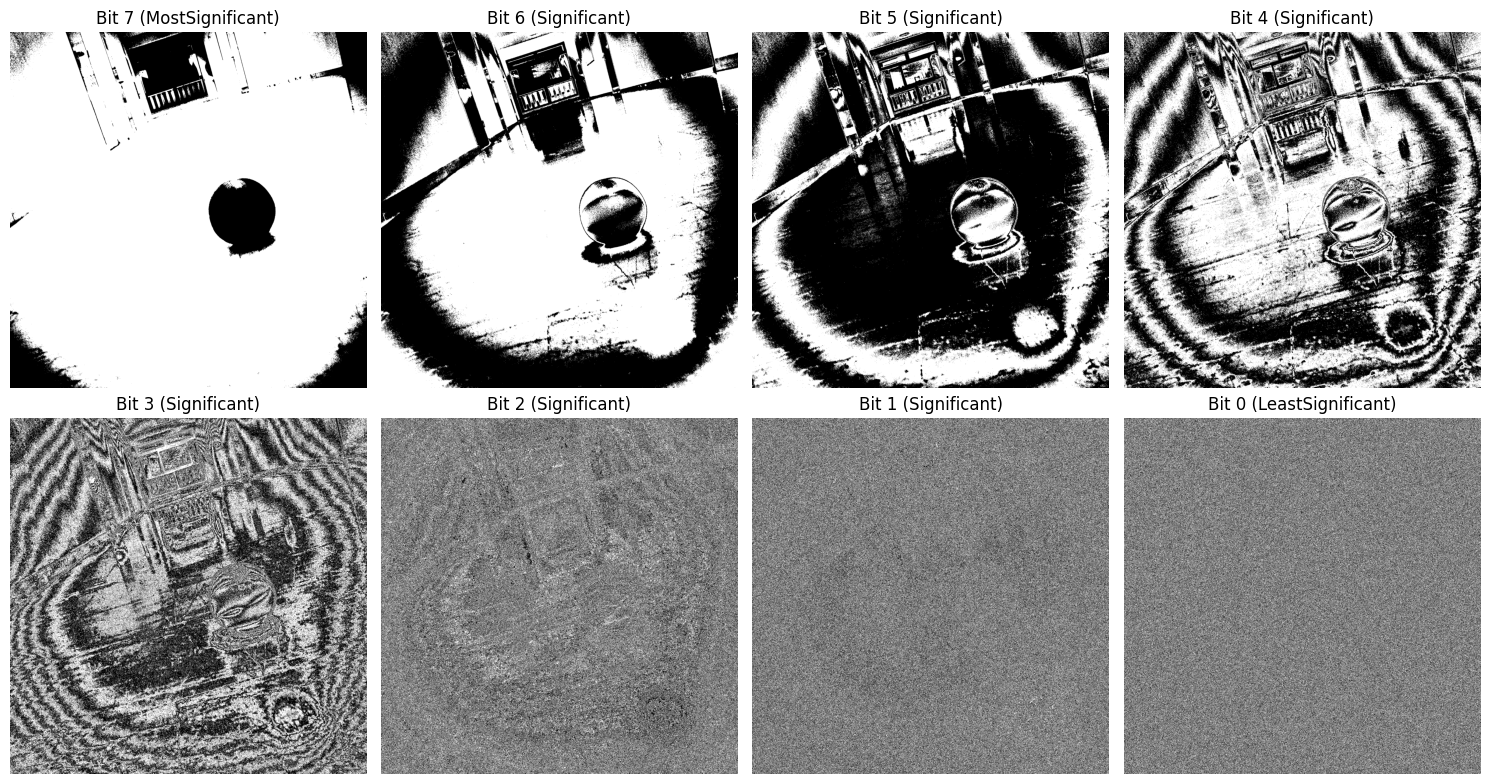

In [5]:
def main():
    # Example usage
    image_path = '/content/gdrive/MyDrive/Courses/TEL 750 - Digital Image Processing/infomm.jpg'
    image = cv2.imread(img_file) # this image is in BGR format

    try:
        # Decompose the image into bit planes
        bit_planes = decompose_bit_planes(image_path)

        # Display the results
        display_bit_planes(bit_planes)

        # Optionally save the bit planes
        for i, plane in enumerate(bit_planes):
            cv2.imwrite(f'bit_plane_{7-i}.png', plane)

    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()